In [35]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
pio.renderers.deault = "png" # So that plots show on github

## Data Directories:

In [2]:
#--------Movie Lens Data directories-----------
MLens = "../Data/ml-latest-small/movies.csv"
MLensLinks = "../Data/ml-latest-small/links.csv"
MLensRatings = "../Data/ml-latest-small/ratings.csv"
MLensTags = "../Data/ml-latest-small/tags.csv"
#--------imdb Data directories-----------------
IMDB = "../Data/iMDB/IMDb movies.csv"
IMDBName = "../Data/iMDB/IMDb names.csv"
IMDBRatings = "../Data/iMDB/IMDb ratings.csv"
IMDBPrincipals = "../Data/iMDB/IMDb title_principals.csv"

In [3]:
imdbdf = pd.read_csv(IMDB,low_memory = False)

In [4]:
imdbdf_clean = imdbdf[['title','year', 'genre', 'duration', 'country', 'director', 'writer', 'production_company', 'actors', 'avg_vote']] #keep the wanted column

In [5]:
imdbdf_clean

,title,year,genre,duration,country,director,writer,production_company,actors,avg_vote
0,Miss Jerry,1894,Romance,45,USA,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8
3,Cleopatra,1912,"Drama, History",100,USA,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0
...,...,...,...,...,...,...,...,...,...,...
85850,Le lion,2020,Comedy,95,"France, Belgium",Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",5.3
85851,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",7.7
85852,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",7.9
85853,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",6.4


Remove the row where the value for column 'year' is 'TV Movie 2019'

In [6]:
#imdbdf_clean[imdbdf_clean["year"] == 'TV Movie 2019']["year"].apply(lambda x: x[-4:])
imdbdf_clean = imdbdf_clean[imdbdf_clean.year != 'TV Movie 2019']
imdbdf_clean['year'] = imdbdf_clean['year'].astype('int')

In [7]:
imdbdf_clean.isna().sum() #find all the NaN values

title                    0
year                     0
genre                    0
duration                 0
country                 64
director                87
writer                1572
production_company    4455
actors                  69
avg_vote                 0
dtype: int64

In [8]:
imdbdf_clean = imdbdf_clean.dropna() #drop all the rows with NaN values
imdbdf_clean.isna().sum()

title                 0
year                  0
genre                 0
duration              0
country               0
director              0
writer                0
production_company    0
actors                0
avg_vote              0
dtype: int64

Separate the countries so we can analyze them separately.
This piece of code will be used later on (in the section "top countries creating movies").

In [9]:
countries = {} #create empty dictionary
list_countries = list(imdbdf_clean['country']) #set up a list of countries
for i in list_countries:
    i = list(i.split(',')) #split countries separated by commas
    if len(i) == 1: #if 1 country in countries.keys()
        if i in list(countries.keys()): #countries.keys() is the country name, countries.values() is the count of country name
            countries[i] +=1 #count
        else:
            countries[i[0]] = 0
    else:
        for j in i: #does the same but for len(i) != 1
            if j in list(countries.keys()):
                countries[j] += 1 #count
            else:
                countries[j] =1

Separate the genre so we can analyze them separately
This piece of code will be used later on.

In [10]:
genre = list(imdbdf_clean['genre'])
genre_list = [] #create an empty list

for i in genre:
    i = list(i.split(',')) #split words when comma
    for j in i:
        genre_list.append(j.replace(' ', '')) #replace extra space
        
genre_counter = Counter(genre_list) #We'll need it after

In [11]:
imdbdf_clean.describe()

,year,duration,avg_vote
count,80161.000000,80161.000000,80161.000000
mean,1992.965644,100.016342,5.913369
std,24.551436,22.023683,1.216666
min,1894.000000,41.000000,1.000000
25%,1977.000000,88.000000,5.300000
50%,2002.000000,96.000000,6.100000
75%,2013.000000,108.000000,6.800000
max,2020.000000,808.000000,9.800000


**Distribution per year:**

In [12]:
#groupby year and count how many title we have each year
title = imdbdf_clean.groupby('year').agg({'title': ['count']})
title.columns = ['Title Count']
title = title.sort_values('Title Count', ascending = False)
title.head(5)

,Title Count
year,
2017,3010
2018,2957
2016,2895
2015,2742
2014,2675


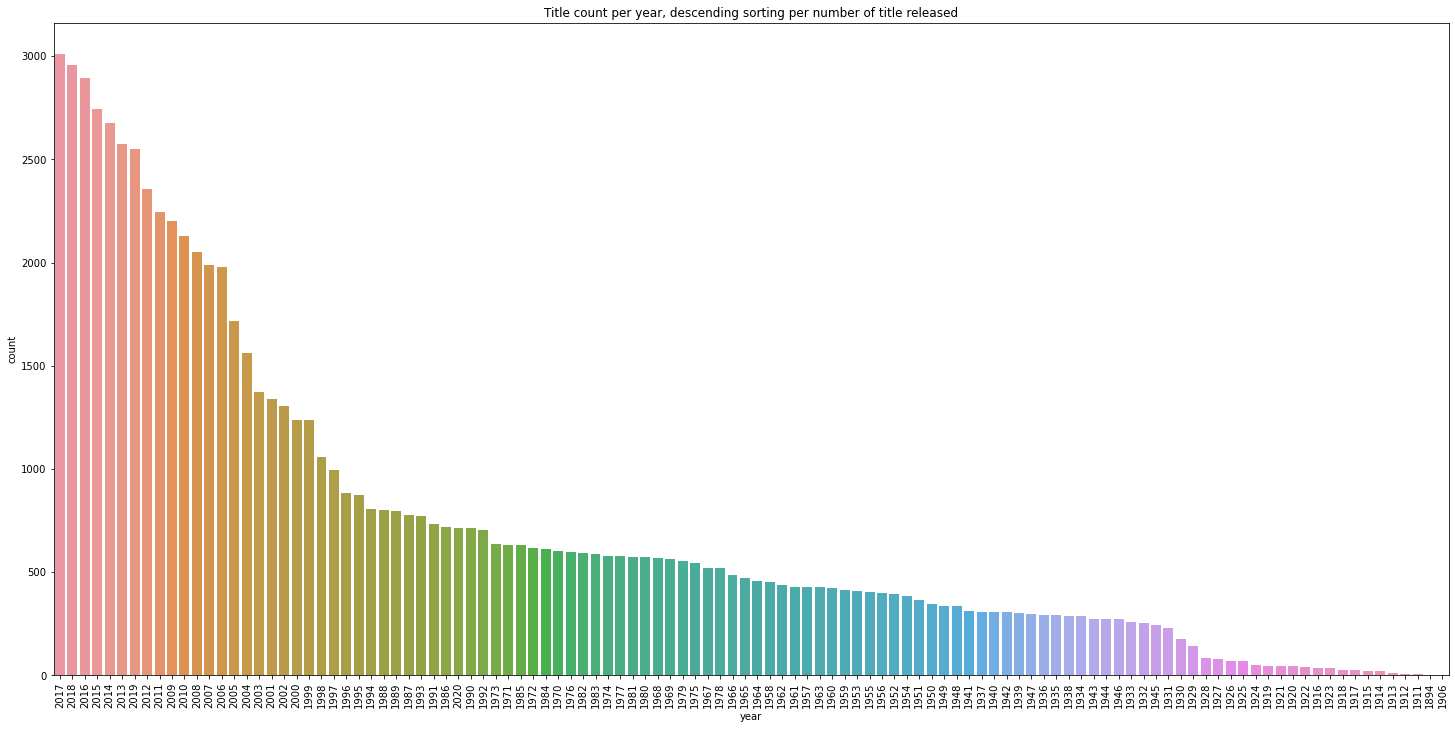

In [13]:
#visualize with a bar graph in descending title count order 
fig_dim = (25,12)
fig, ax = plt.subplots(figsize = fig_dim)
sns.countplot(x = 'year', data = imdbdf_clean, order = imdbdf_clean['year'].value_counts().index)
plt.title('Title count per year, descending sorting per number of title released')
plt.xticks(rotation=90)
plt.show()

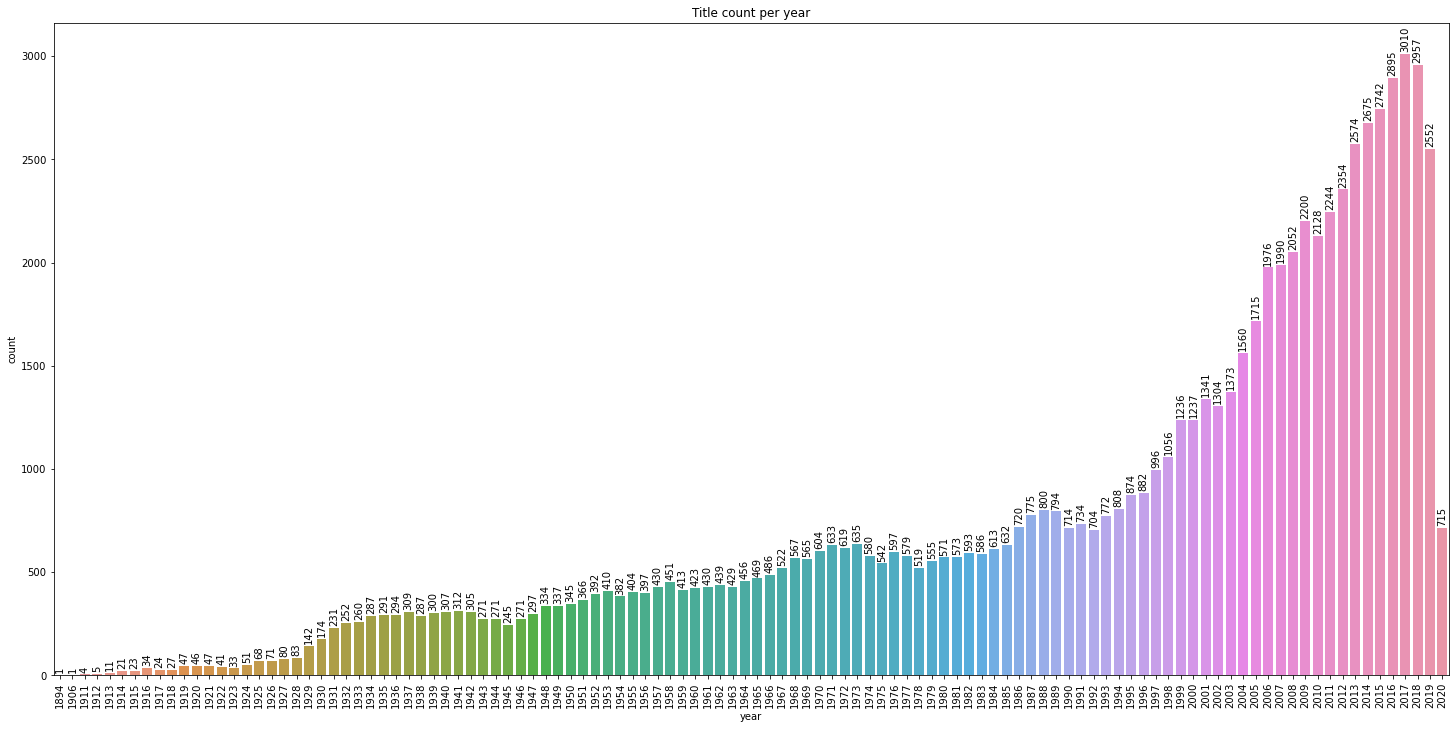

In [14]:
#visualize with a plot graph in ascending year order
fig_dim = (25,12)
fig, ax = plt.subplots(figsize = fig_dim)
ax = sns.countplot(x = 'year', data = imdbdf_clean)
plt.title('Title count per year')

#display the count on the bar graph
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height() + 20), rotation=90)
    
plt.xticks(rotation=90)
plt.show()

Get the growth year to year (in %):

In [15]:
title

,Title Count
year,
2017,3010
2018,2957
2016,2895
2015,2742
2014,2675
...,...
1913,11
1912,5
1911,4


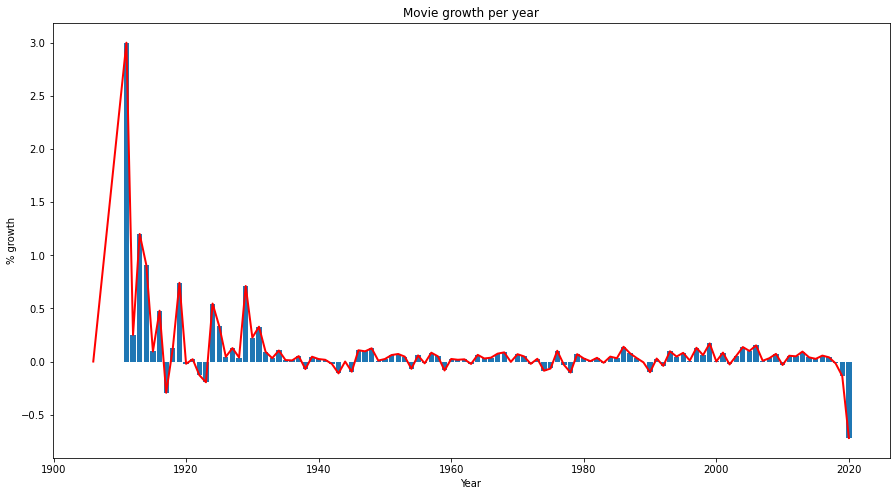

In [16]:
title = title.sort_index() #sort by year. The year is the index
growth = title.pct_change() #calculate the %growth year by year
growth.columns = ['% growth']
plt.figure(figsize = (15, 8))
x = growth['% growth']
y = growth.index
plt.bar(y, x)
plt.plot(y, x, color = 'red', linewidth = 2.0)
plt.title('Movie growth per year')
plt.xlabel('Year')
plt.ylabel('% growth')
plt.show()

**Get the top rated movies:**

Top 10 rated movie with the year and the country

All time best movies:

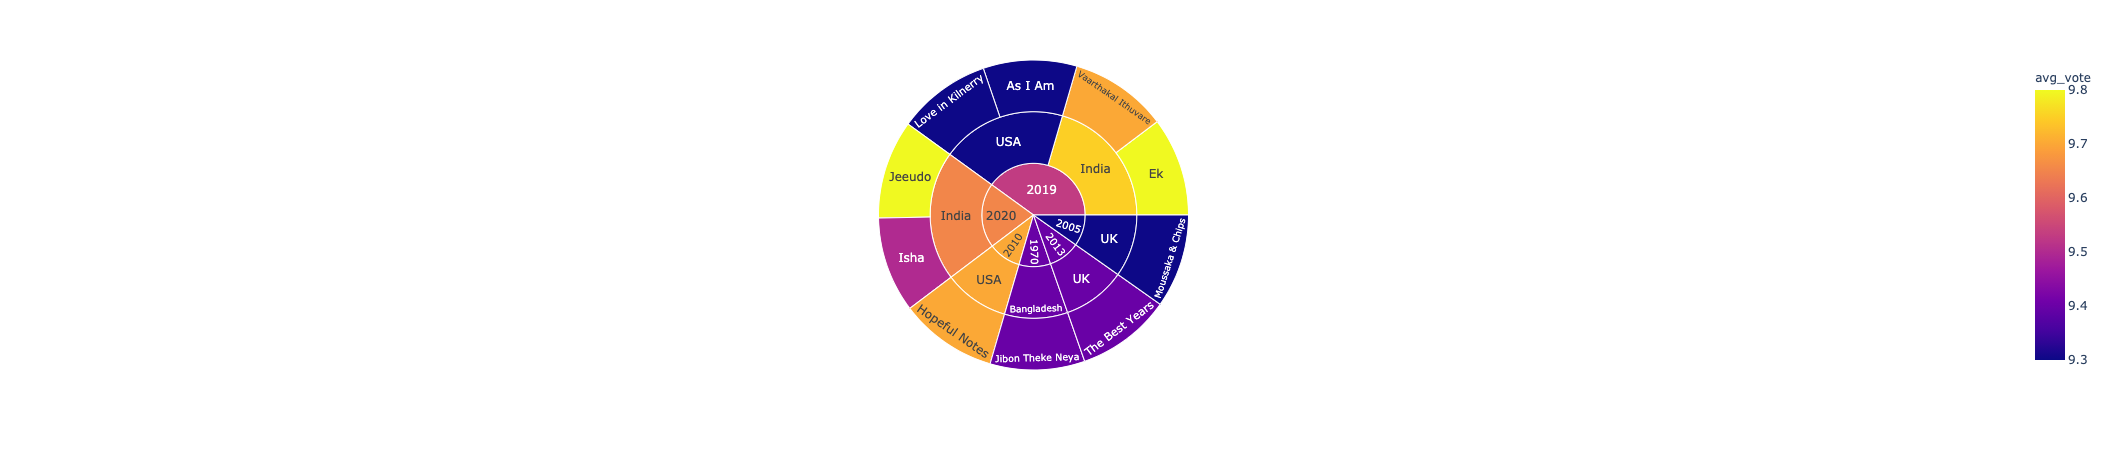

In [36]:
imdbdf_clean = imdbdf_clean.sort_values(by = 'avg_vote', ascending = False)
rating = imdbdf_clean[0:10] #get the 1st 10 values
fig = px.sunburst(rating, path = ['year', 'country', 'title'], values = 'avg_vote', color = 'avg_vote')
fig.show()

Let's consider the best movies of this century:

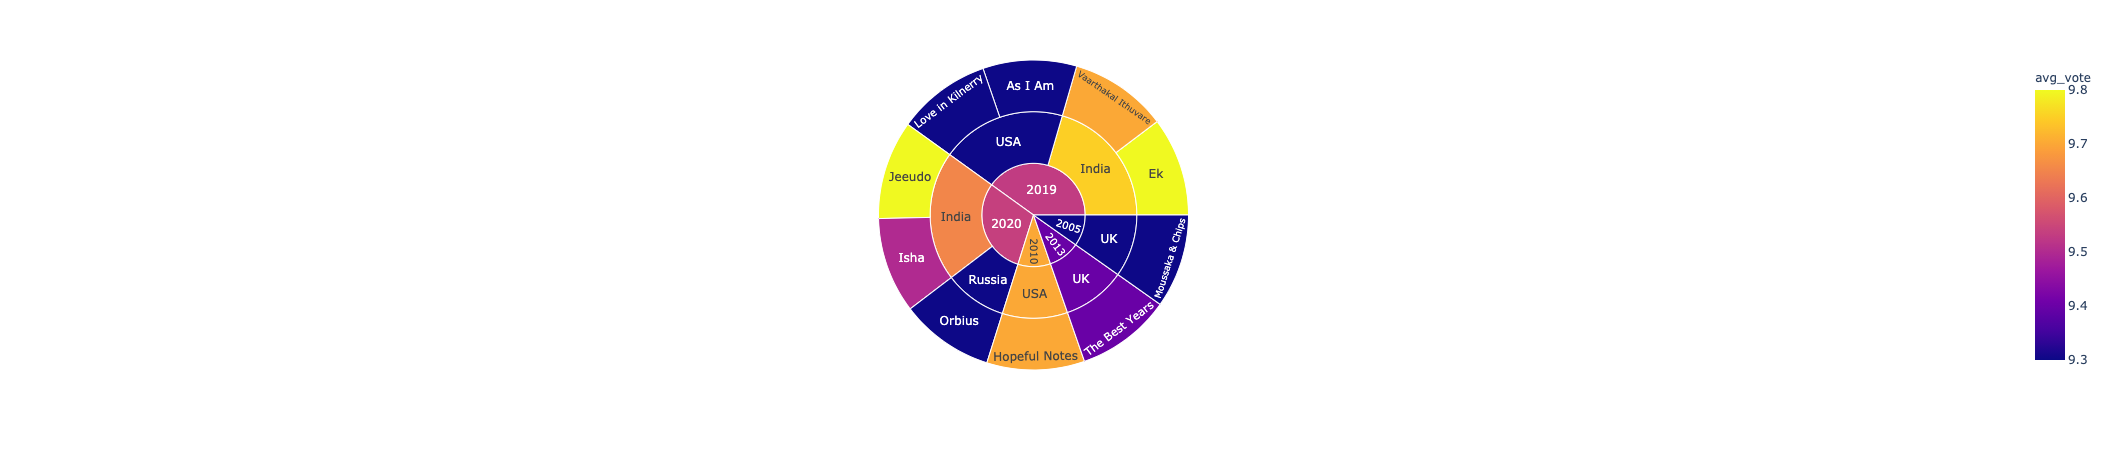

In [37]:
rating = imdbdf_clean[imdbdf_clean.year > 1999][0:10] #get the 1st 10 values
fig = px.sunburst(rating, path = ['year', 'country', 'title'], values = 'avg_vote', color = 'avg_vote')
fig.show()

Let's see which year was the best year for movies production:

In [19]:
best = imdbdf_clean.groupby('year').agg({'avg_vote': ['mean']})
best.columns = ['Average rating']
best = best.sort_values('Average rating', ascending = False)
best.head()

,Average rating
year,
1923,6.812121
1924,6.790196
1928,6.778313
1926,6.698592
1921,6.697872


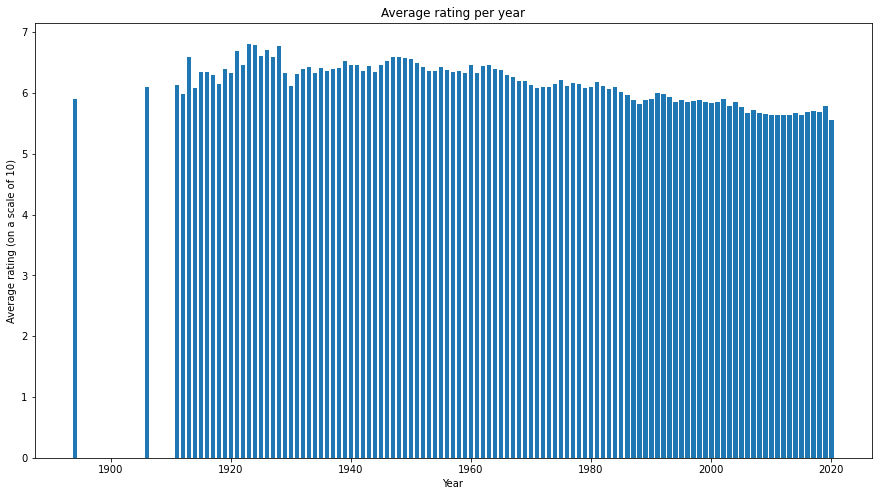

In [20]:
plt.figure(figsize = (15, 8))
x = best['Average rating'].round(decimals = 3)
y = best.index
plt.bar(y, x)
plt.title('Average rating per year')
plt.xlabel('Year')
plt.ylabel('Average rating (on a scale of 10)')
plt.show()

In [21]:
best = best[best.index >=2000]

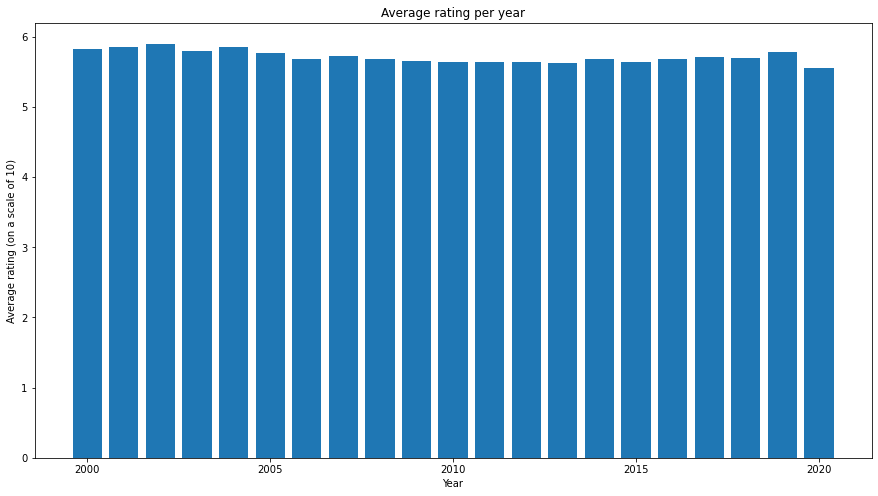

In [22]:
plt.figure(figsize = (15, 8))
x = best['Average rating'].round(decimals = 3)
y = best.index
plt.bar(y, x)
plt.title('Average rating per year')
plt.xlabel('Year')
plt.ylabel('Average rating (on a scale of 10)')
plt.show()

Top countries creating movies:

In [23]:
countries_fin = {} #create an empty dictionary
for country, no in countries.items(): 
    country = country.replace(' ', '') #remove the extra space create by the split(',')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no

#sort the country according to their count
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse= True)}

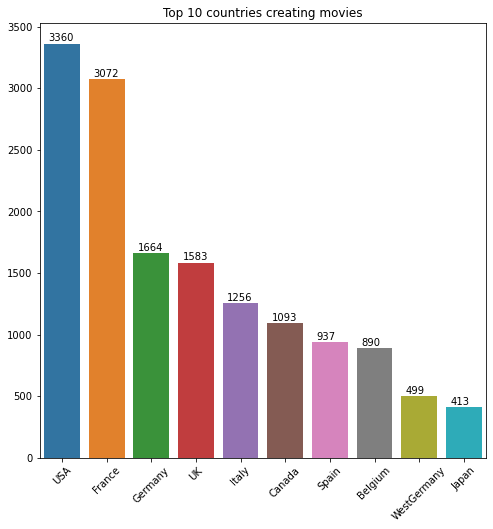

In [24]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
plt.title('Top 10 countries creating movies')
plt.xticks(rotation=45)
#display the count on the bar graph
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 20))
    
plt.show()

Let's see how each country conributes in the volume of all movies produced:

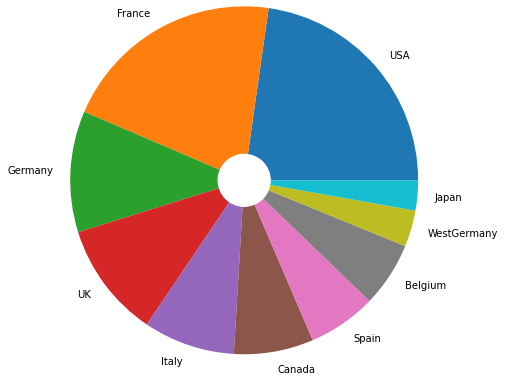

In [25]:
#create the dataframe
df_countries = pd.DataFrame(list(countries_fin.items()), columns = ['Country', 'Country count'])

#plot a pie chart of the distribution of each country per region
fig,ax = plt.subplots()
x = df_countries['Country count'][:10] #get the top 10 countries
labels = df_countries['Country'][:10] #get the top 10 countries
ax.pie(x, labels = labels, radius = 2)

#create a white circle at the center of the pie to create a donut chart
my_circle = plt.Circle( (0,0), 0.3, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

**Genre:**

In [26]:
genres = {k: v for k, v in sorted(genre_counter.items(), key=lambda item: item[1], reverse= True)}
genres

{'Drama': 44166,
 'Comedy': 27475,
 'Romance': 13233,
 'Action': 12084,
 'Thriller': 10706,
 'Crime': 10541,
 'Horror': 8896,
 'Adventure': 7302,
 'Mystery': 4933,
 'Family': 3723,
 'Fantasy': 3585,
 'Sci-Fi': 3411,
 'Biography': 2314,
 'History': 2190,
 'War': 2132,
 'Animation': 1994,
 'Musical': 1907,
 'Music': 1620,
 'Western': 1556,
 'Sport': 1025,
 'Film-Noir': 661,
 'Reality-TV': 2,
 'Documentary': 1,
 'News': 1}

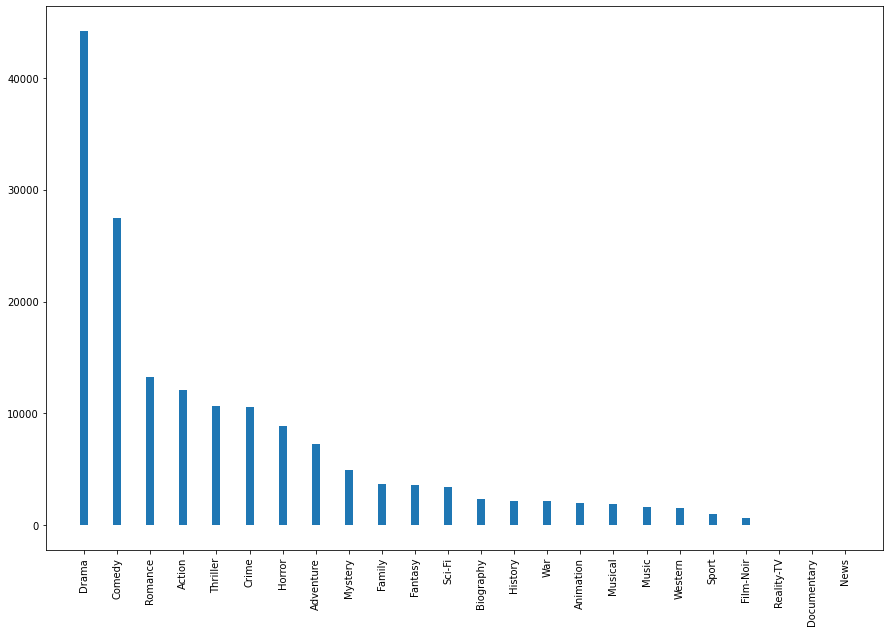

In [27]:
fig_dim = (15,10)
fig, ax = plt.subplots(figsize = fig_dim)
x = list(genres.keys())
y = list(genres.values())
ax.vlines(x, ymin = 0, ymax = y, linewidth = 8)
plt.xticks(rotation = 90)
plt.show()

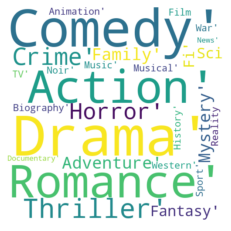

In [28]:
#create list of genre (unique genre)
text = list(genres.keys())

#create the wordcloud object
wordcloud = WordCloud(width = 500, height = 500, max_words = 100000, background_color = 'white').generate(str(text))

#Display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

Exploring Plotly:

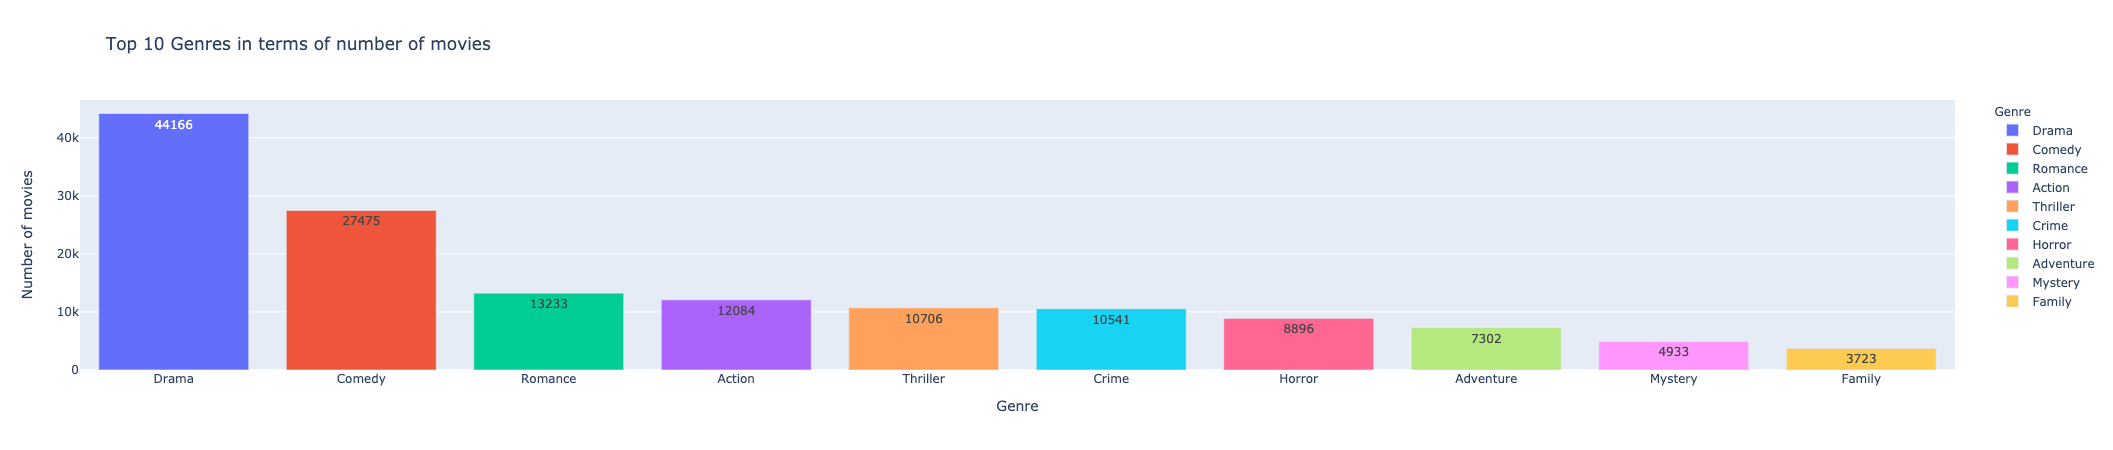

In [38]:
config = {'responsive': False}
genres_df = pd.DataFrame({"Genre":genres.keys(),"number_of_movies":genres.values()})

genres_bar = px.bar(genres_df[:10], 
                    x = 'Genre', 
                    y = 'number_of_movies', 
                    title = 'Top 10 Genres in terms of number of movies',
                    text = 'number_of_movies', 
                    labels = dict(genre = 'Genre', number_of_movies = 'Number of movies'),
                    color = 'Genre')
                    
genres_bar.show()

In [39]:
years_df = imdbdf_clean[['year','title', 'genre']].groupby(['year','genre']).count().reset_index().rename(columns={'title':'number_of_movies'})
years_df = years_df.sort_values(by=['number_of_movies'], ascending=False)
years_df = years_df[years_df['year'] >= 2000]#Movies of this century 
years_df = years_df[years_df['number_of_movies'] >= 100]#years where the number of movies is over 100

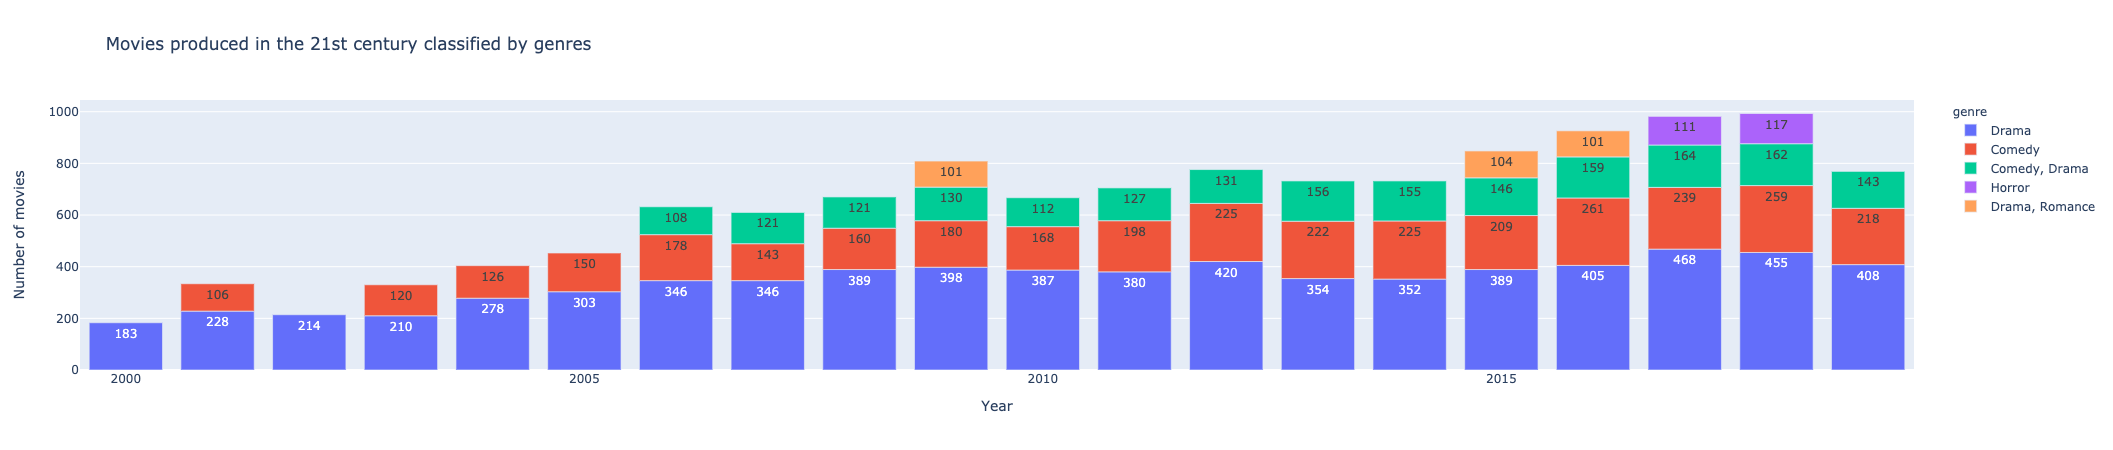

In [40]:
detailed_genres_bar = px.bar(years_df, 
                             x ='year', 
                             y = 'number_of_movies', 
                             color = 'genre', 
                             title='Movies produced in the 21st century classified by genres', 
                             text = 'number_of_movies',
                             labels = dict(year = 'Year', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()

**Producction Companies:**

In [41]:
production_companies_df = imdbdf_clean[['production_company','title']].groupby(['production_company']).count().reset_index().rename(columns={'title':'number_of_movies'})
production_companies_df = production_companies_df.sort_values(by='number_of_movies', ascending=False)
production_companies_df = production_companies_df.iloc[:10]
production_companies_df

,production_company,number_of_movies
20624,Metro-Goldwyn-Mayer (MGM),1283
30637,Warner Bros.,1152
8179,Columbia Pictures,913
23166,Paramount Pictures,903
29674,Twentieth Century Fox,864
29942,Universal Pictures,732
24630,RKO Radio Pictures,535
21216,Mosfilm,278
29938,Universal International Pictures (UI),272
6402,Canal+,231


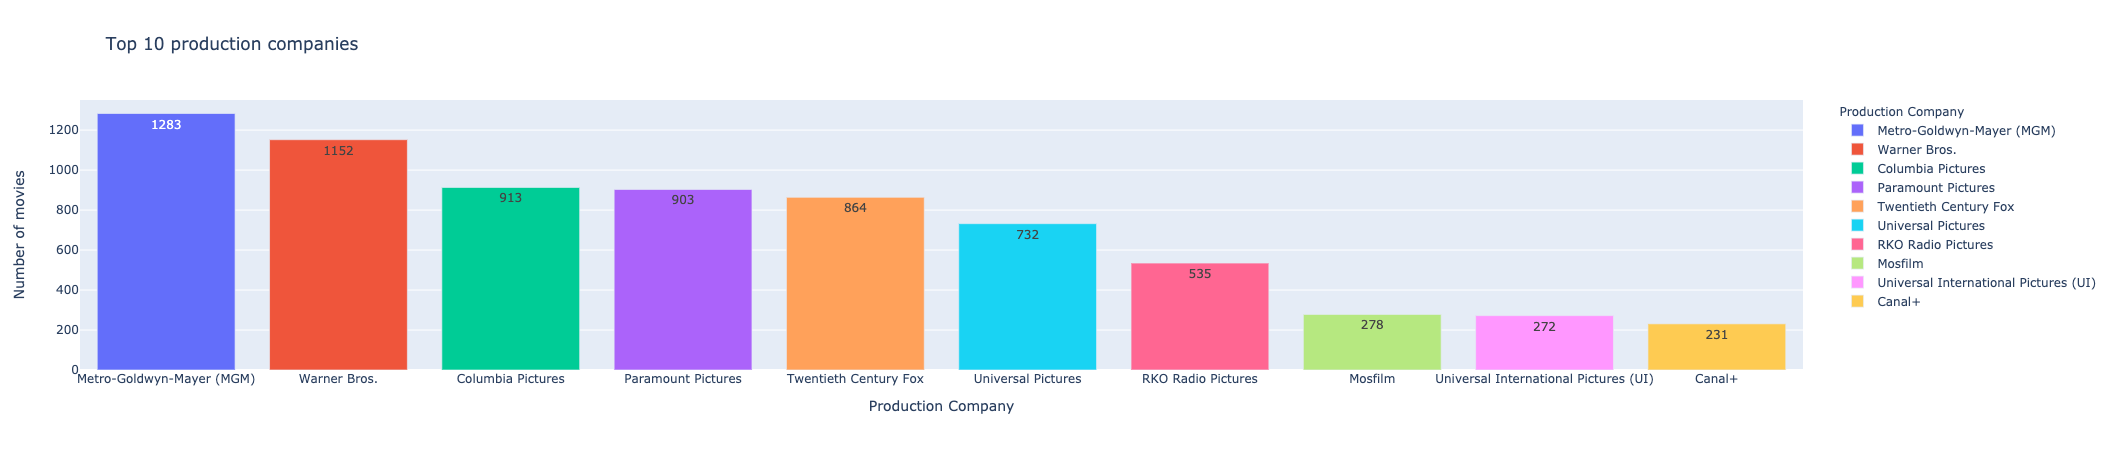

In [42]:
detailed_genres_bar = px.bar(production_companies_df, 
                             x ='production_company', 
                             y = 'number_of_movies', 
                             color = 'production_company', 
                             title='Top 10 production companies', 
                             text = 'number_of_movies',
                             labels = dict(production_company = 'Production Company', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()

If we choose only this century:

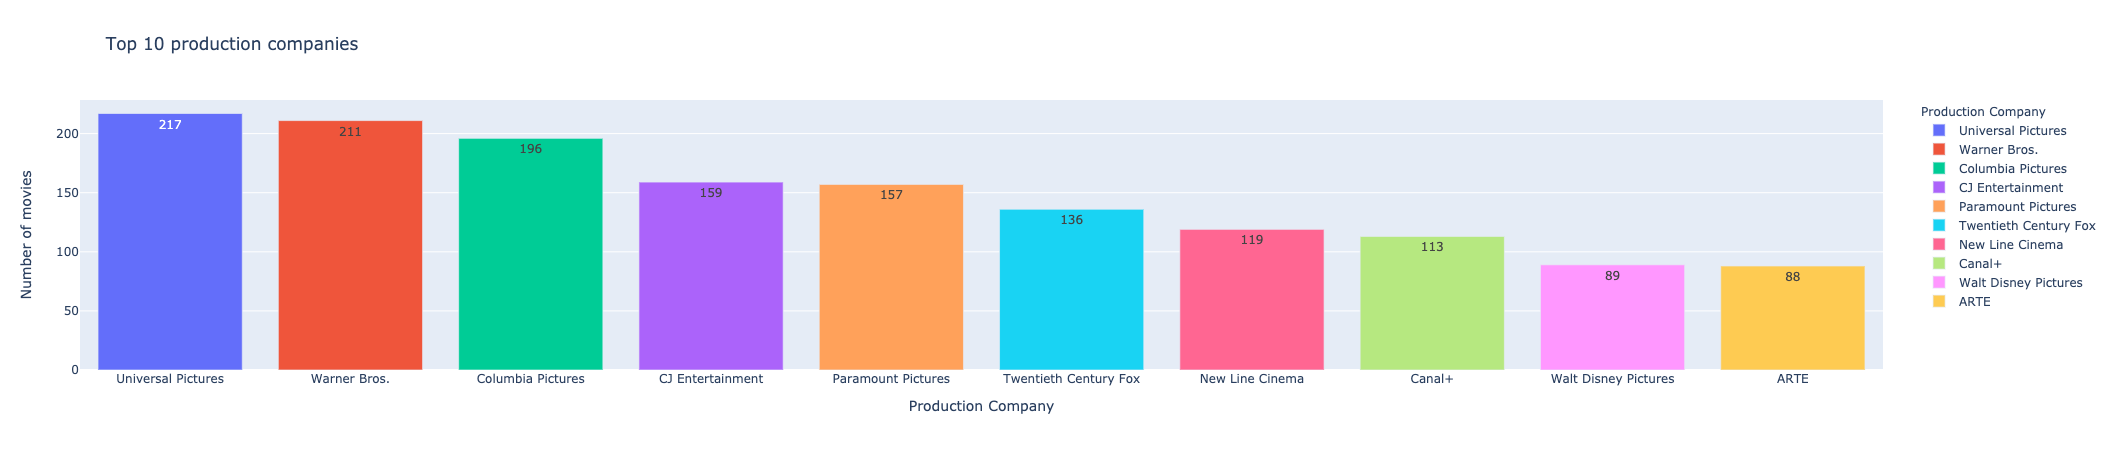

In [44]:
production_companies_df = imdbdf_clean[imdbdf_clean.year > 1999][['production_company','title']].groupby(['production_company']).count().reset_index().rename(columns={'title':'number_of_movies'})
production_companies_df = production_companies_df.sort_values(by='number_of_movies', ascending=False)
production_companies_df = production_companies_df.iloc[:10]
detailed_genres_bar = px.bar(production_companies_df, 
                             x ='production_company', 
                             y = 'number_of_movies', 
                             color = 'production_company', 
                             title='Top 10 production companies', 
                             text = 'number_of_movies',
                             labels = dict(production_company = 'Production Company', number_of_movies = 'Number of movies')
                             )
detailed_genres_bar.show()